In [1]:
import sys
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt

sys.path.insert(0, "../../")

from compdas.data import read_hdf5

In [6]:
output_path = "data"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [2]:
filename = "../data/Ridgecrest_ODH3-2021-06-15 183838Z.h5"
data = read_hdf5(None, filename)
data = data[0, :, :]

In [3]:
print(data.shape)

torch.Size([1280, 203264])


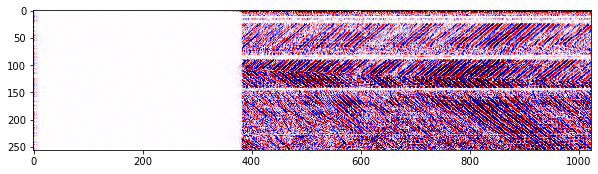

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(data[:256, :1024], vmin=-1, vmax=1, cmap="seismic")
plt.show()

In [8]:
with h5py.File(os.path.join(output_path, os.path.basename(filename)), "w") as fp:
    fp.create_dataset("Data", data=data)

with open("data.lst", 'w') as fp:
    fp.write(os.path.basename(filename))